## Example: Travel time comparison for two scenarios

First import required packages, which are model-system data explorer and matplotilib for plotting.

In [21]:
# Other packages
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Data explorer
MODEL_SYSTEM_PATH = "../scripts/"
sys.path.append(MODEL_SYSTEM_PATH)
from data_explorer.scenario_data import ScenarioData
from data_explorer.scenario_comparison import ScenarioComparison

Then we'll load scenario data for scenarios. Currently we don't have two test data sets, so load scenario twice.

In [22]:
scenario1 = ScenarioData(
    scenario_name = "2030_test", 
    submodel = "uusimaa",
    result_data_path = "../Scripts/tests/test_data/Results/test/", 
    base_data_path = "../Scripts/tests/test_data/Base_input_data/2018_zonedata/", 
    spatial_data_path = "../Scripts/tests/test_data/Base_input_data/Geodata/"
)

scenario0 = ScenarioData(
    scenario_name = "2030_test", 
    submodel = "uusimaa",
    result_data_path = "../Scripts/tests/test_data/Results/test/", 
    base_data_path = "../Scripts/tests/test_data/Base_input_data/2018_zonedata/", 
    spatial_data_path = "../Scripts/tests/test_data/Base_input_data/Geodata/"
)

### Travel time comparison for two scenarios
Travel times analysis to zone 102. Notice test data is same for both scenarios, so shows a bit boring results.

c:\Users\suppoatt\.virtualenvs\Scripts-w_cXNV7M\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\suppoatt\.virtualenvs\Scripts-w_cXNV7M\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


(6637031.47703984, 6933246.59399223)

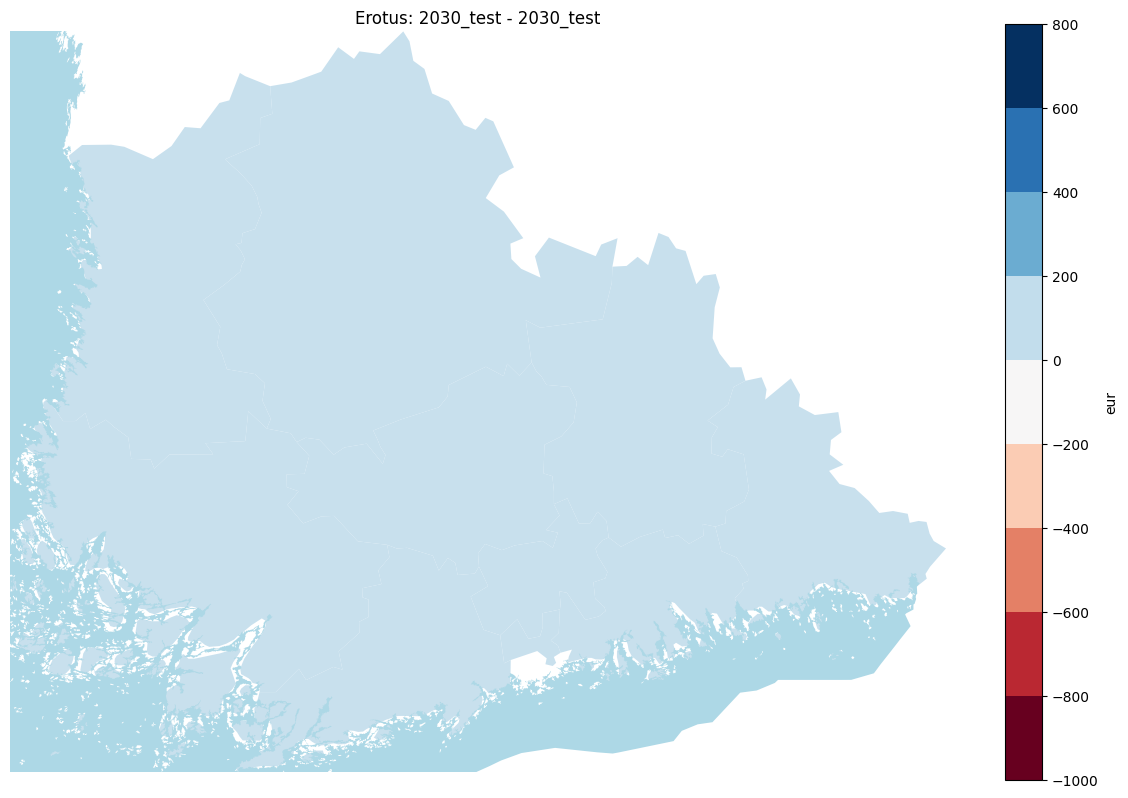

In [23]:
# Load comparison data
comparison = ScenarioComparison(scenario0, scenario1)
data = comparison.travel_times("aht", "time", "transit_work", 102, geometry = True)

# Matplot
fig, ax = plt.subplots(figsize=(12, 8))
plt.style.use("default")

# Discrete colour scale
discrete_cmap = plt.cm.get_cmap('RdBu')

# Set bins of between min and max
MIN = -1000
MAX = 1000
INTERVAL = 200
norm = mpl.colors.BoundaryNorm(np.arange(MIN, MAX, INTERVAL), discrete_cmap.N)

# Visualize travel times into continuous coloring scheme
data.plot(ax=ax, column="difference", linewidth=0.03, 
          cmap=discrete_cmap, norm=norm,
          alpha=0.9, legend=True, 
          legend_kwds={"label": "eur", "orientation": "vertical"})

# Add links to plot
scenario1.get_basemap_layer("water").plot(ax=ax, facecolor="#add8e6")

# Themes
ax.set_axis_off()
plt.tight_layout()
plt.title(f"Erotus: {scenario1.name} - {scenario0.name}")

# Set axis bb
xmin, ymin, xmax, ymax = data.total_bounds
pad = 0.05  # add a padding around the geometry
ax.set_xlim(xmin-pad, xmax+pad)
ax.set_ylim(ymin-pad, ymax+pad)